In [ ]:
#讀取資料
#連接google雲端
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/類神經網路

##### 請把心電圖資料集分成訓練、驗證以及測試資料集，並且轉成灰階圖片，再完成以下題目

## 第一題

### part1(LEAD_I)

#### 1.根據所被分配到的模型，使用transfer_learning並且連接分類器(架構自己設定)，訓練LEAD_I資料集，accuracy需達80%以上

In [ ]:
# 資料夾路徑
data_folder_path = '/kaggle/input/dataset/lead1/LEAD_I_output_classes_removed_border'

In [ ]:
### 讀取資料並將資料拆分  有2種方法擇一使用
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os
import numpy as np
import pandas as pd
# 資料夾路徑
data_folder_path = '/kaggle/input/dataset/lead1/LEAD_I_output_classes_removed_border'

# 建立資料集
data = []
labels = []

# 遍歷資料夾，獲取資料和標籤
for folder_name in os.listdir(data_folder_path):
    folder_path = os.path.join(data_folder_path, folder_name)
    if os.path.isdir(folder_path):
        label = folder_name.split('_')[-1] # 從資料夾名稱中取得標籤
        for filename in os.listdir(folder_path):
            file_path = os.path.join(folder_path, filename)
            data.append(file_path)
            labels.append(label)

# 轉換為NumPy陣列
data = np.array(data)
labels = np.array(labels)

# 使用 train_test_split 分割資料集
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)
train_data1, val_data, train_labels1, val_labels = train_test_split(train_data, train_labels, test_size=0.1, random_state=42)
# 建立 ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255,
                 samplewise_center=True,
                 samplewise_std_normalization=True,
                 width_shift_range=0.1,
                 height_shift_range=0.1,
                )  # 可以加入其他的圖像增強方法


# 建立 generator for training data
train_generator = datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': train_data1, 'class': train_labels1}),
    x_col='filename',
    y_col='class',
    batch_size=64,
    target_size=(224, 224),  # 設定圖像尺寸
    shuffle=True,
    class_mode='categorical',  # 因為我們使用的是整數的標籤，所以設定為 'raw'
)

# 建立 generator for validation data
val_generator = datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': val_data, 'class': val_labels}),
    x_col='filename',
    y_col='class',
    batch_size=64,
    shuffle=True,
    target_size=(224, 224),
    class_mode='categorical'
)

# 建立 generator for testing data
test_generator = datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': test_data, 'class': test_labels}),
    x_col='filename',
    y_col='class',
    shuffle=False,
    batch_size=64,
    target_size=(224, 224),
    class_mode='categorical'
)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Found 9216 validated image filenames belonging to 11 classes.
Found 1025 validated image filenames belonging to 11 classes.
Found 2561 validated image filenames belonging to 11 classes.


In [ ]:
# #讀取資料並將資料拆分 有2種方法擇一使用
# from tensorflow.keras.applications.imagenet_utils import preprocess_input
# import matplotlib.pyplot as plt
# import os
# import numpy as np
# import tensorflow as tf
# import cv2
# import tensorflow.keras.layers as layers
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from sklearn.model_selection import train_test_split
# import pandas as pd
# from tensorflow.keras.optimizers import SGD

# batch_size = 32
# img_size = (180, 180)
# img_shape = (180, 180, 3)

# datagen = ImageDataGenerator(
#     rescale=1./255,
#     validation_split=0.2,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )


# #datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# train_generator = datagen.flow_from_directory(
#     directory= data_folder_path,
#     target_size=img_size,
#     batch_size=batch_size,
#     class_mode="categorical",
#     seed=42,
#     shuffle=True,
#     subset='training'
# )

# validation_generator = datagen.flow_from_directory(
#     directory= data_folder_path,
#     target_size=img_size,
#     batch_size=batch_size,
#     class_mode="categorical",
#     seed=42,
#     shuffle=False,
#     subset='validation'
# )

# # 將原始的驗證集分成驗證集和測試集
# validation_images, test_images, validation_labels, test_labels = train_test_split(
#     validation_generator.filenames,
#     validation_generator.labels,
#     test_size=0.5,
#     random_state=42
# )

# validation_df = pd.DataFrame({"filename": validation_images, "category": validation_labels.astype(str)})
# test_df = pd.DataFrame({"filename": test_images, "category": test_labels.astype(str)})

# validation_generator = datagen.flow_from_dataframe(
#     dataframe=validation_df,
#     directory=data_folder_path,
#     target_size=img_size,
#     batch_size=batch_size,
#     class_mode="categorical",
#     seed=42,
#     shuffle=True,
#     x_col="filename",
#     y_col="category"
# )

# test_generator = datagen.flow_from_dataframe(
#     dataframe=test_df,
#     directory=data_folder_path,
#     target_size=img_size,
#     batch_size=batch_size,
#     class_mode="categorical",
#     seed=42,
#     shuffle=False,
#     x_col="filename",
#     y_col="category"
# )

In [2]:
#引用套件
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import Xception
from tensorflow.keras import layers

In [ ]:
# 載入 Xception 基本模型
xception_base = Xception(
    weights=None,
    include_top=False,
    input_shape=(224, 224, 3)
)

# 因為kaggle的問題無法引入權重，所以改成直接上網抓xception_weights，並引用其預訓練權重文件的路徑，
pretrained_weights_path = '/kaggle/input/xcep-model/xception_weights_tf_dim_ordering_tf_kernels_notop.h5'

# 載入預訓練權重
xception_base.load_weights(pretrained_weights_path)


# 凍結 Xception base model 的權重
# for layer in xception_base.layers:
#     layer.trainable = False
freeze_layers = 10

for i, layer in enumerate(xception_base.layers):
    if i < freeze_layers:
        layer.trainable = False
    else:
        break


In [ ]:
xception_base.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 111, 111, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 111, 111, 32)         0         ['block1_conv1_bn[0][0]

In [ ]:
#加上自己設計架構
x = xception_base.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)  # 調整 Dense 層的單元數
x = tf.keras.layers.Dropout(0.2)(x)  # 添加 Dropout 層，可以根據需要調整 dropout 比例
x = Dense(256, activation='relu')(x)  # 調整 Dense 層的單元數
x = tf.keras.layers.Dropout(0.2)(x)  # 添加 Dropout 層，可以根據需要調整 dropout 比例
x = Dense(128, activation='relu')(x)  # 再添加一層 Dense 層

output_layer = layers.Dense(units = 11, activation = 'softmax')(x)


# 建立 Xception model
model = tf.keras.Model(inputs=xception_base.input, outputs=output_layer)




In [ ]:
#設定MODEL相關數據(優化器之類的)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=4e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#這個是將xception凍結10層而已
epochs = 15
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

Epoch 1/15
144/144 [==============================] - 278s 2s/step - loss: 1.4804 - accuracy: 0.4632 - val_loss: 1.9140 - val_accuracy: 0.4332
Epoch 2/15
144/144 [==============================] - 182s 1s/step - loss: 1.1122 - accuracy: 0.6005 - val_loss: 1.1365 - val_accuracy: 0.6185
Epoch 3/15
144/144 [==============================] - 182s 1s/step - loss: 0.9028 - accuracy: 0.6773 - val_loss: 1.0664 - val_accuracy: 0.6146
Epoch 4/15
144/144 [==============================] - 181s 1s/step - loss: 0.7523 - accuracy: 0.7288 - val_loss: 1.0925 - val_accuracy: 0.6488
Epoch 5/15
144/144 [==============================] - 179s 1s/step - loss: 0.6322 - accuracy: 0.7775 - val_loss: 0.6986 - val_accuracy: 0.7727
Epoch 6/15
144/144 [==============================] - 181s 1s/step - loss: 0.5245 - accuracy: 0.8188 - val_loss: 0.7892 - val_accuracy: 0.7444
Epoch 7/15
144/144 [==============================] - 179s 1s/step - loss: 0.4377 - accuracy: 0.8438 - val_loss: 0.6604 - val_accuracy: 0.7824

In [ ]:
# 保存模型到 /kaggle/working/
model.save('/kaggle/working/RM_freeze10layer.h5')

#### 2.根據第一小題的結果，使用兩種不同的optimizer比較哪一種對於辨識效果比較好

In [ ]:
## SGD
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=4e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

epochs=15
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

Epoch 1/15
144/144 [==============================] - 191s 1s/step - loss: 2.4185 - accuracy: 0.1044 - val_loss: 2.3395 - val_accuracy: 0.1785
Epoch 2/15
144/144 [==============================] - 180s 1s/step - loss: 2.2913 - accuracy: 0.2512 - val_loss: 2.2156 - val_accuracy: 0.4380
Epoch 3/15
144/144 [==============================] - 180s 1s/step - loss: 2.1688 - accuracy: 0.4328 - val_loss: 2.0953 - val_accuracy: 0.5941
Epoch 4/15
144/144 [==============================] - 179s 1s/step - loss: 2.0479 - accuracy: 0.5549 - val_loss: 1.9756 - val_accuracy: 0.6312
Epoch 5/15
144/144 [==============================] - 183s 1s/step - loss: 1.9225 - accuracy: 0.6214 - val_loss: 1.8507 - val_accuracy: 0.6537
Epoch 6/15
144/144 [==============================] - 179s 1s/step - loss: 1.7964 - accuracy: 0.6574 - val_loss: 1.7248 - val_accuracy: 0.6634
Epoch 7/15
144/144 [==============================] - 179s 1s/step - loss: 1.6699 - accuracy: 0.6812 - val_loss: 1.6054 - val_accuracy: 0.6654

In [ ]:
## RMSprop
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=4e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

epochs=15
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

Epoch 1/15
144/144 [==============================] - 197s 1s/step - loss: 1.5789 - accuracy: 0.4119 - val_loss: 1.3763 - val_accuracy: 0.4888
Epoch 2/15
144/144 [==============================] - 178s 1s/step - loss: 1.1633 - accuracy: 0.5737 - val_loss: 1.4219 - val_accuracy: 0.4741
Epoch 3/15
144/144 [==============================] - 180s 1s/step - loss: 0.9258 - accuracy: 0.6726 - val_loss: 0.9504 - val_accuracy: 0.6634
Epoch 4/15
144/144 [==============================] - 179s 1s/step - loss: 0.7457 - accuracy: 0.7386 - val_loss: 0.8259 - val_accuracy: 0.7132
Epoch 5/15
144/144 [==============================] - 179s 1s/step - loss: 0.6002 - accuracy: 0.7871 - val_loss: 0.8800 - val_accuracy: 0.7454
Epoch 6/15
144/144 [==============================] - 180s 1s/step - loss: 0.5059 - accuracy: 0.8228 - val_loss: 1.2021 - val_accuracy: 0.6741
Epoch 7/15
144/144 [==============================] - 180s 1s/step - loss: 0.4246 - accuracy: 0.8523 - val_loss: 0.9667 - val_accuracy: 0.7649

雖然跟Adam差不多，但從上面可以看到使用RMSprop驗證集準確度相對還是好一點

#### 3.根據第二小題的結果，取用較好結果的優化器，並且改變learning_rate，說明嘗試過的數值，哪一個對於辨識效果比較好

In [ ]:
## RMSprop
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=4e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

epochs=15
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

Epoch 1/15
144/144 [==============================] - 208s 1s/step - loss: 1.8373 - accuracy: 0.3427 - val_loss: 1.6189 - val_accuracy: 0.4449
Epoch 2/15
144/144 [==============================] - 177s 1s/step - loss: 1.4088 - accuracy: 0.4840 - val_loss: 1.3715 - val_accuracy: 0.5190
Epoch 3/15
144/144 [==============================] - 174s 1s/step - loss: 1.2553 - accuracy: 0.5347 - val_loss: 1.1913 - val_accuracy: 0.5649
Epoch 4/15
144/144 [==============================] - 175s 1s/step - loss: 1.1238 - accuracy: 0.5883 - val_loss: 1.1250 - val_accuracy: 0.6039
Epoch 5/15
144/144 [==============================] - 175s 1s/step - loss: 1.0094 - accuracy: 0.6378 - val_loss: 1.0434 - val_accuracy: 0.6351
Epoch 6/15
144/144 [==============================] - 176s 1s/step - loss: 0.9024 - accuracy: 0.6815 - val_loss: 0.9756 - val_accuracy: 0.6820
Epoch 7/15
144/144 [==============================] - 176s 1s/step - loss: 0.8056 - accuracy: 0.7148 - val_loss: 0.8661 - val_accuracy: 0.6946

learning rate從4e-4到4e-5，結果看起來其實是差不多的，不過4e-4略勝一籌，但4e-4其訓練和驗證準確度相差較多，比較有overfitting的可能性，可能重訓練一次結果就不同了

#### 4.根據以上小題，將較好的結果畫出loss_curve、accuracy_curve、confusion_matrix及Classification_report


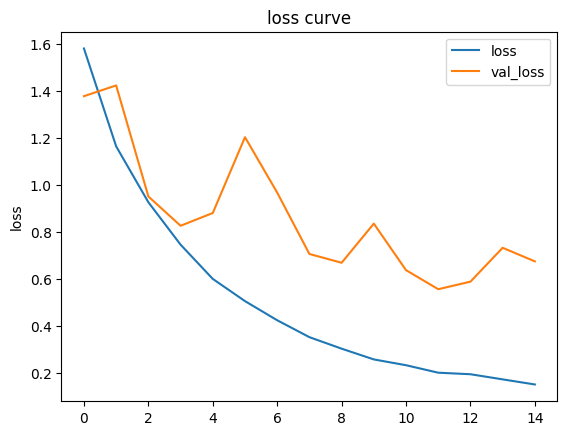

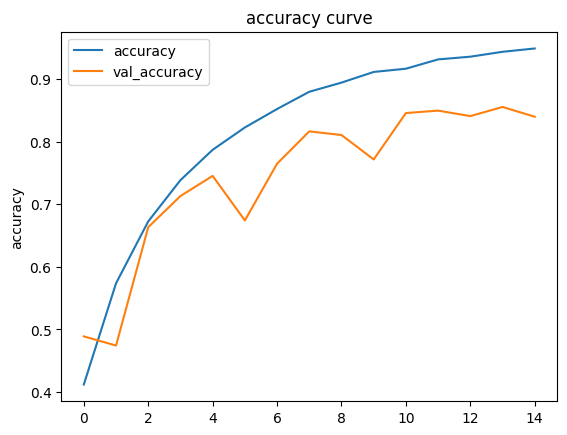

In [ ]:
#畫loss、accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.title('loss curve')
plt.ylabel('loss')
plt.legend()
plt.show()
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.title('accuracy curve')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from tensorflow.keras.utils import to_categorical

# 預測測試集
test_predictions = model.predict(test_generator)
# 將預測轉換為類別標籤
predicted_labels = np.argmax(test_predictions, axis=1)

# 繪製混淆矩陣
cm = confusion_matrix(np.argmax(test_generator, axis=1), predicted_labels)

# 使用Seaborn繪製混淆矩陣的熱圖
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1', 'Class 2','Class 3','Class 4','Class 5','Class 6','Class 7','Class 8','Class 9','Class 10'], yticklabels=['Class 0', 'Class 1', 'Class 2','Class 3','Class 4','Class 5','Class 6','Class 7','Class 8','Class 9','Class 10'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 打印分類報告
print(classification_report(np.argmax(test_label, axis=1), predicted_labels, target_names=['Class 0', 'Class 1', 'Class 2','Class 3','Class 4','Class 5','Class 6','Class 7','Class 8','Class 9','Class 10']))

In [ ]:
#引用評估模型的套件
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay

In [ ]:
#建立 Classification Report

predictions = np.argmax(model.predict(test_generator), axis=1)
#predict = model.predict(pca_X_test)

cr = classification_report(test_generator.classes, predictions)
print(cr)

41/41 [==============================] - 47s 1s/step
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       517
           1       0.92      0.81      0.86       545
           2       1.00      0.75      0.86         4
           3       0.81      0.81      0.81       150
           4       0.80      0.90      0.85       628
           5       0.72      0.73      0.73        96
           6       0.82      0.74      0.78       409
           7       0.81      0.76      0.78       132
           8       0.90      0.93      0.92        58
           9       1.00      0.44      0.62         9
          10       0.67      0.92      0.77        13

    accuracy                           0.83      2561
   macro avg       0.84      0.79      0.80      2561
weighted avg       0.83      0.83      0.83      2561



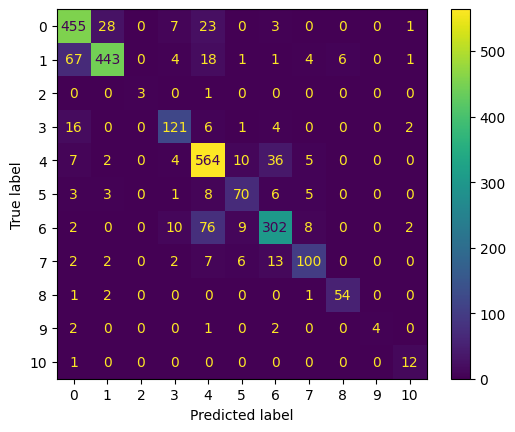

In [ ]:
#建立Confusion Matrix
cm = confusion_matrix(test_generator.classes, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#### 5.(加分題)嘗試data_augmentation，比較結果是否變差或變好


### part2(被分配到的另一個導程)


#### 1.根據所被分配到的模型，以part1第一小題的架構，訓練被分配到的另一個導程資料集

In [ ]:
### 讀取資料並將資料拆分  有2種方法擇一使用
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os
import numpy as np
import pandas as pd
# 資料夾路徑
data_folder_path = '/kaggle/input/dataset/LEAD_aVL_output_classes_removed_border/LEAD_aVL_output_classes_removed_border'

# 建立資料集
data = []
labels = []

# 遍歷資料夾，獲取資料和標籤
for folder_name in os.listdir(data_folder_path):
    folder_path = os.path.join(data_folder_path, folder_name)
    if os.path.isdir(folder_path):
        label = folder_name.split('_')[-1] # 從資料夾名稱中取得標籤
        for filename in os.listdir(folder_path):
            file_path = os.path.join(folder_path, filename)
            data.append(file_path)
            labels.append(label)

# 轉換為NumPy陣列
data = np.array(data)
labels = np.array(labels)

# 使用 train_test_split 分割資料集
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)
train_data1, val_data, train_labels1, val_labels = train_test_split(train_data, train_labels, test_size=0.1, random_state=42)
# 建立 ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255,
                 samplewise_center=True,
                 samplewise_std_normalization=True,
                 width_shift_range=0.1,
                 height_shift_range=0.1,
                )  # 可以加入其他的圖像增強方法


# 建立 generator for training data
train_generator = datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': train_data1, 'class': train_labels1}),
    x_col='filename',
    y_col='class',
    batch_size=64,
    target_size=(224, 224),  # 設定圖像尺寸
    shuffle=True,
    class_mode='categorical',  # 因為我們使用的是整數的標籤，所以設定為 'raw'
)

# 建立 generator for validation data
val_generator = datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': val_data, 'class': val_labels}),
    x_col='filename',
    y_col='class',
    batch_size=64,
    shuffle=True,
    target_size=(224, 224),
    class_mode='categorical'
)

# 建立 generator for testing data
test_generator = datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': test_data, 'class': test_labels}),
    x_col='filename',
    y_col='class',
    shuffle=False,
    batch_size=64,
    target_size=(224, 224),
    class_mode='categorical'
)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Found 8595 validated image filenames belonging to 11 classes.
Found 956 validated image filenames belonging to 11 classes.
Found 2388 validated image filenames belonging to 11 classes.


In [ ]:
#引用套件
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import Xception
from tensorflow.keras import layers

In [ ]:
from keras.layers import Input, Concatenate
from keras.models import Model

# 載入 Xception 基本模型
xception_base = Xception(
    weights=None,
    include_top=False,
    input_shape=(224, 224, 3)
)

# 因為kaggle的問題無法引入權重，所以改成直接上網抓xception_weights，並引用其預訓練權重文件的路徑，
pretrained_weights_path = '/kaggle/input/xcep-model/xception_weights_tf_dim_ordering_tf_kernels_notop.h5'

# 載入預訓練權重
xception_base.load_weights(pretrained_weights_path)

# 凍結 Xception base model 的權重
freeze_layers = 10

for i, layer in enumerate(xception_base.layers):
    if i < freeze_layers:
        layer.trainable = False
    else:
        break

In [ ]:
#加入自己設計架構
x = xception_base.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)  # 調整 Dense 層的單元數
x = tf.keras.layers.Dropout(0.2)(x)  # 添加 Dropout 層，可以根據需要調整 dropout 比例
x = Dense(256, activation='relu')(x)  # 調整 Dense 層的單元數
x = tf.keras.layers.Dropout(0.2)(x)  # 添加 Dropout 層，可以根據需要調整 dropout 比例
x = Dense(128, activation='relu')(x)  # 再添加一層 Dense 層

output_layer = layers.Dense(units = 11, activation = 'softmax')(x)


# 建立 Xception model
model = tf.keras.Model(inputs=xception_base.input, outputs=output_layer)




In [ ]:
#設計model相關參數
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=4e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#開始訓練
epochs=15
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

Epoch 1/15
135/135 [==============================] - 191s 1s/step - loss: 1.3538 - accuracy: 0.4917 - val_loss: 1.2559 - val_accuracy: 0.5837
Epoch 2/15
135/135 [==============================] - 168s 1s/step - loss: 1.0266 - accuracy: 0.6063 - val_loss: 0.9658 - val_accuracy: 0.6276
Epoch 3/15
135/135 [==============================] - 164s 1s/step - loss: 0.8503 - accuracy: 0.6857 - val_loss: 0.9288 - val_accuracy: 0.6506
Epoch 4/15
135/135 [==============================] - 164s 1s/step - loss: 0.7057 - accuracy: 0.7383 - val_loss: 0.7536 - val_accuracy: 0.7176
Epoch 5/15
135/135 [==============================] - 164s 1s/step - loss: 0.5738 - accuracy: 0.7864 - val_loss: 0.8318 - val_accuracy: 0.6893
Epoch 6/15
135/135 [==============================] - 164s 1s/step - loss: 0.4859 - accuracy: 0.8221 - val_loss: 0.6069 - val_accuracy: 0.7939
Epoch 7/15
135/135 [==============================] - 164s 1s/step - loss: 0.4188 - accuracy: 0.8483 - val_loss: 0.6614 - val_accuracy: 0.7531

#### 2.使用與part1相同的兩個optimizer，比較哪一種對於辨識效果比較好

In [ ]:
## SGD
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=4e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

epochs=15
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

Epoch 1/15
135/135 [==============================] - 177s 1s/step - loss: 2.3743 - accuracy: 0.1392 - val_loss: 2.3415 - val_accuracy: 0.1663
Epoch 2/15
135/135 [==============================] - 164s 1s/step - loss: 2.3437 - accuracy: 0.2035 - val_loss: 2.3125 - val_accuracy: 0.2500
Epoch 3/15
135/135 [==============================] - 164s 1s/step - loss: 2.2818 - accuracy: 0.2411 - val_loss: 2.2428 - val_accuracy: 0.2762
Epoch 4/15
135/135 [==============================] - 164s 1s/step - loss: 2.2166 - accuracy: 0.2598 - val_loss: 2.1679 - val_accuracy: 0.2814
Epoch 5/15
135/135 [==============================] - 165s 1s/step - loss: 2.1510 - accuracy: 0.2733 - val_loss: 2.0997 - val_accuracy: 0.2835
Epoch 6/15
135/135 [==============================] - 164s 1s/step - loss: 2.0928 - accuracy: 0.2756 - val_loss: 2.0607 - val_accuracy: 0.2814
Epoch 7/15
135/135 [==============================] - 165s 1s/step - loss: 2.0397 - accuracy: 0.2756 - val_loss: 2.0071 - val_accuracy: 0.2814

In [ ]:
## RMSprop
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=4e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

epochs=15
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

Epoch 1/15
135/135 [==============================] - 288s 2s/step - loss: 1.3388 - accuracy: 0.4849 - val_loss: 1.1674 - val_accuracy: 0.5743
Epoch 2/15
135/135 [==============================] - 192s 1s/step - loss: 0.9955 - accuracy: 0.6204 - val_loss: 1.6710 - val_accuracy: 0.4017
Epoch 3/15
135/135 [==============================] - 194s 1s/step - loss: 0.8135 - accuracy: 0.6898 - val_loss: 1.1324 - val_accuracy: 0.5847
Epoch 4/15
135/135 [==============================] - 191s 1s/step - loss: 0.6607 - accuracy: 0.7437 - val_loss: 0.7126 - val_accuracy: 0.7259
Epoch 5/15
135/135 [==============================] - 191s 1s/step - loss: 0.5465 - accuracy: 0.7958 - val_loss: 0.7011 - val_accuracy: 0.7657
Epoch 6/15
135/135 [==============================] - 190s 1s/step - loss: 0.4560 - accuracy: 0.8304 - val_loss: 0.9422 - val_accuracy: 0.7092
Epoch 7/15
135/135 [==============================] - 190s 1s/step - loss: 0.3789 - accuracy: 0.8588 - val_loss: 0.6899 - val_accuracy: 0.7908

一樣是RMSprop和Adam相比，SGD遠輸他們，而這次變成Adam比較高了

#### 3.使用與part1第三小題一樣的optimizer及learning，並畫出loss_curve、accuracy_curve、confusion_matrix及Classification_report

In [ ]:
## RMSprop
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=4e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

epochs=15
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

Epoch 1/15
135/135 [==============================] - 211s 1s/step - loss: 1.7035 - accuracy: 0.3853 - val_loss: 1.5645 - val_accuracy: 0.4561
Epoch 2/15
135/135 [==============================] - 190s 1s/step - loss: 1.2581 - accuracy: 0.5244 - val_loss: 1.0939 - val_accuracy: 0.5952
Epoch 3/15
135/135 [==============================] - 191s 1s/step - loss: 1.1241 - accuracy: 0.5680 - val_loss: 1.0485 - val_accuracy: 0.6098
Epoch 4/15
135/135 [==============================] - 192s 1s/step - loss: 1.0118 - accuracy: 0.6097 - val_loss: 0.9554 - val_accuracy: 0.6391
Epoch 5/15
135/135 [==============================] - 191s 1s/step - loss: 0.9093 - accuracy: 0.6519 - val_loss: 0.8590 - val_accuracy: 0.6810
Epoch 6/15
135/135 [==============================] - 192s 1s/step - loss: 0.8102 - accuracy: 0.6898 - val_loss: 0.7746 - val_accuracy: 0.7113
Epoch 7/15
135/135 [==============================] - 192s 1s/step - loss: 0.7262 - accuracy: 0.7307 - val_loss: 0.7136 - val_accuracy: 0.7333

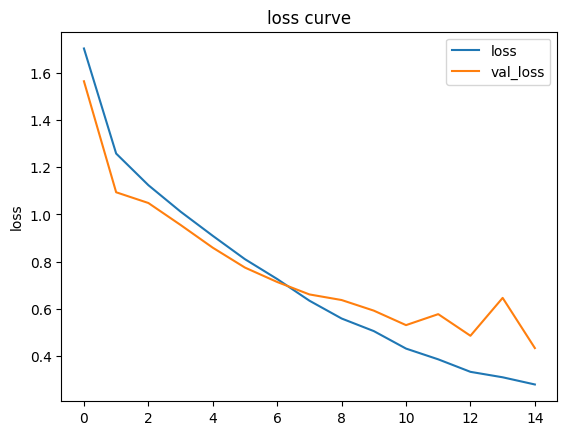

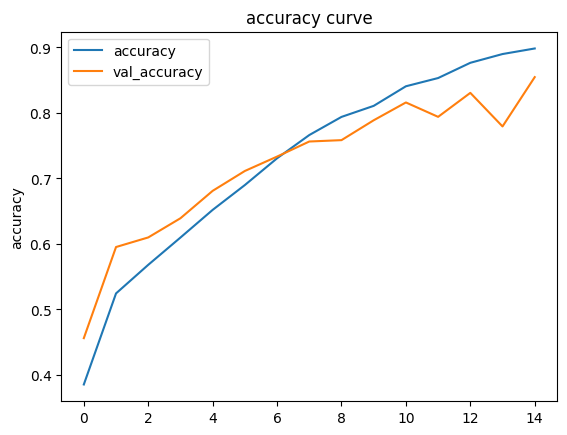

In [ ]:
#畫loss、accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.title('loss curve')
plt.ylabel('loss')
plt.legend()
plt.show()
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.title('accuracy curve')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
# from sklearn.metrics import confusion_matrix, classification_report
# import seaborn as sns
# from tensorflow.keras.utils import to_categorical



# # 預測測試集
# test_predictions = model.predict(test_data)
# # 將預測轉換為類別標籤
# predicted_labels = np.argmax(test_predictions, axis=1)

# # 繪製混淆矩陣
# cm = confusion_matrix(np.argmax(test_label, axis=1), predicted_labels)

# # 使用Seaborn繪製混淆矩陣的熱圖
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1', 'Class 2','Class 3','Class 4','Class 5','Class 6','Class 7','Class 8','Class 9','Class 10'], yticklabels=['Class 0', 'Class 1', 'Class 2','Class 3','Class 4','Class 5','Class 6','Class 7','Class 8','Class 9','Class 10'])
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Confusion Matrix')
# plt.show()

# # 打印分類報告
# print(classification_report(np.argmax(test_label, axis=1), predicted_labels, target_names=['Class 0', 'Class 1', 'Class 2','Class 3','Class 4','Class 5','Class 6','Class 7','Class 8','Class 9','Class 10']))

In [ ]:
#引用評估模型的套件
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay

In [ ]:
#建立 Classification Report

predictions = np.argmax(model.predict(test_generator), axis=1)
#predict = model.predict(pca_X_test)

cr = classification_report(test_generator.classes, predictions)
print(cr)

38/38 [==============================] - 68s 2s/step
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       421
           1       0.89      0.87      0.88       450
           2       0.80      1.00      0.89         4
           3       0.79      0.81      0.80       119
           4       0.90      0.82      0.86       657
           5       0.70      0.58      0.63       107
           6       0.79      0.85      0.82       428
           7       0.72      0.84      0.78       134
           8       0.80      0.83      0.81        42
           9       1.00      0.44      0.62         9
          10       0.75      0.35      0.48        17

    accuracy                           0.83      2388
   macro avg       0.81      0.75      0.77      2388
weighted avg       0.84      0.83      0.83      2388



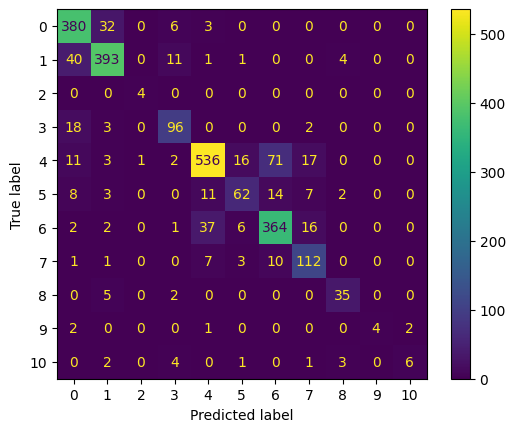

In [ ]:
#建立Confusion Matrix
cm = confusion_matrix(test_generator.classes, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#### 5.嘗試data_augmentation，比較結果是否變差或變好(加分題)


## 第二題

### part1(LEAD_I)

#### 1.根據所被分配到的模型，外接CNN，並改變內部的參數(filter、padding、stride、pooling)，後面連接的分類器使用第一大題的結構(禁止修改)，accuracy需達80%以上


In [5]:
### 讀取資料並將資料拆分
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os
import numpy as np
import pandas as pd
# 資料夾路徑
data_folder_path = '/kaggle/input/dataset/lead1/LEAD_I_output_classes_removed_border'

# 建立資料集
data = []
labels = []

# 遍歷資料夾，獲取資料和標籤
for folder_name in os.listdir(data_folder_path):
    folder_path = os.path.join(data_folder_path, folder_name)
    if os.path.isdir(folder_path):
        label = folder_name.split('_')[-1] # 從資料夾名稱中取得標籤
        for filename in os.listdir(folder_path):
            file_path = os.path.join(folder_path, filename)
            data.append(file_path)
            labels.append(label)

# 轉換為NumPy陣列
data = np.array(data)
labels = np.array(labels)

# 使用 train_test_split 分割資料集
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)
train_data1, val_data, train_labels1, val_labels = train_test_split(train_data, train_labels, test_size=0.1, random_state=42)
# 建立 ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255,
                 samplewise_center=True,
                 samplewise_std_normalization=True,
                 width_shift_range=0.1,
                 height_shift_range=0.1,
                )  # 可以加入其他的圖像增強方法


# 建立 generator for training data
train_generator = datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': train_data1, 'class': train_labels1}),
    x_col='filename',
    y_col='class',
    batch_size=64,
    target_size=(224, 224),  # 設定圖像尺寸
    shuffle=True,
    class_mode='categorical',  # 因為我們使用的是整數的標籤，所以設定為 'raw'
)

# 建立 generator for validation data
val_generator = datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': val_data, 'class': val_labels}),
    x_col='filename',
    y_col='class',
    batch_size=64,
    shuffle=True,
    target_size=(224, 224),
    class_mode='categorical'
)

# 建立 generator for testing data
test_generator = datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': test_data, 'class': test_labels}),
    x_col='filename',
    y_col='class',
    shuffle=False,
    batch_size=64,
    target_size=(224, 224),
    class_mode='categorical'
)

Found 9216 validated image filenames belonging to 11 classes.
Found 1025 validated image filenames belonging to 11 classes.
Found 2561 validated image filenames belonging to 11 classes.


In [ ]:
# from tensorflow.keras.applications.imagenet_utils import preprocess_input
# import matplotlib.pyplot as plt
# import os
# import numpy as np
# import tensorflow as tf
# import cv2
# import tensorflow.keras.layers as layers
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from sklearn.model_selection import train_test_split
# import pandas as pd
# from tensorflow.keras.optimizers import SGD

# batch_size = 32
# img_size = (180, 180)
# img_shape = (180, 180, 3)

# datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# train_generator = datagen.flow_from_directory(
#     directory="LEAD_I_output_classes_removed_border",
#     target_size=img_size,
#     batch_size=batch_size,
#     class_mode="categorical",
#     seed=42,
#     shuffle=True,
#     subset='training'
# )

# validation_generator = datagen.flow_from_directory(
#     directory="LEAD_I_output_classes_removed_border",
#     target_size=img_size,
#     batch_size=batch_size,
#     class_mode="categorical",
#     seed=42,
#     shuffle=False,
#     subset='validation'
# )


# # 將原始的驗證集分成驗證集和測試集
# validation_images, test_images, validation_labels, test_labels = train_test_split(
#     validation_generator.filenames,
#     validation_generator.labels,
#     test_size=0.5,
#     random_state=42
# )

# validation_df = pd.DataFrame({"filename": validation_images, "category": validation_labels.astype(str)})
# test_df = pd.DataFrame({"filename": test_images, "category": test_labels.astype(str)})

# validation_generator = datagen.flow_from_dataframe(
#     dataframe=validation_df,
#     directory="LEAD_I_output_classes_removed_border",
#     target_size=img_size,
#     batch_size=batch_size,
#     class_mode="categorical",
#     seed=42,
#     shuffle=True,
#     x_col="filename",
#     y_col="category"
# )

# test_generator = datagen.flow_from_dataframe(
#     dataframe=test_df,
#     directory="LEAD_I_output_classes_removed_border",
#     target_size=img_size,
#     batch_size=batch_size,
#     class_mode="categorical",
#     seed=42,
#     shuffle=False,
#     x_col="filename",
#     y_col="category"
# )

In [15]:
# 載入 Xception 基本模型
xception_base = Xception(
    weights=None,
    include_top=False,
    input_shape=(224, 224, 3)
)

# 因為kaggle的問題無法引入權重，所以改成直接上網抓xception_weights，並引用其預訓練權重文件的路徑，
pretrained_weights_path = '/kaggle/input/xcep-model/xception_weights_tf_dim_ordering_tf_kernels_notop.h5'

# 載入預訓練權重
xception_base.load_weights(pretrained_weights_path)

# 凍結 Xception base model 的權重
freeze_layers = 10

for i, layer in enumerate(xception_base.layers):
    if i < freeze_layers:
        layer.trainable = False
    else:
        break

In [16]:
# 新添加的 Conv2D 層
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(xception_base.output)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)

## 以下部分不能修改
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)  # 調整 Dense 層的單元數
x = tf.keras.layers.Dropout(0.2)(x)  # 添加 Dropout 層，可以根據需要調整 dropout 比例
x = Dense(256, activation='relu')(x)  # 調整 Dense 層的單元數
x = tf.keras.layers.Dropout(0.2)(x)  # 添加 Dropout 層，可以根據需要調整 dropout 比例
x = Dense(128, activation='relu')(x)  # 再添加一層 Dense 層

output_layer = layers.Dense(units = 11, activation = 'softmax')(x)


# 建立 Xception model
model = tf.keras.Model(inputs=xception_base.input, outputs=output_layer)





In [8]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 111, 111, 32)         864       ['input_2[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 111, 111, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 111, 111, 32)         0         ['block1_conv1_bn[0][0]'] 

In [ ]:
# import keras
# import tensorflow as tf
# from tensorflow.keras import datasets, layers, models
# import matplotlib.pyplot as plt
# from keras import applications

# VGG_base=keras.applications.vgg16.VGG16(
#     weights="imagenet",
#     include_top=False,
#     input_shape=(180,180,3)
# )

# for layer in vgg16_base.layers:
#     layer.trainable = False

# # vgg16_base.summary()

# VGG16_model = models.Sequential()
# VGG16_model.add(xception_base)

# # 在 Conv2D 層中添加 padding='same' 參數
# # VGG16_model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
# # VGG16_model.add(layers.MaxPooling2D((2, 2)))
# # VGG16_model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
# # VGG16_model.add(layers.MaxPooling2D((2, 2)))
# # VGG16_model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))

# ## 以下部分不能修改
# # VGG16_model.add(layers.Flatten())
# VGG16_model.add(layers.GlobalAveragePooling2D())
# VGG16_model.add(layers.Dense(512, activation='relu'))
# VGG16_model.add(layers.Dropout(0.2))
# VGG16_model.add(layers.Dense(256, activation='relu'))
# VGG16_model.add(layers.Dropout(0.2))
# VGG16_model.add(layers.Dense(128, activation='relu'))
# VGG16_model.add(layers.Dense(11, activation='softmax'))
# VGG16_model.summary()

In [9]:
## Adam
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=4e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

epochs=15
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

Epoch 1/15
144/144 [==============================] - 287s 2s/step - loss: 1.6609 - accuracy: 0.3736 - val_loss: 1.5664 - val_accuracy: 0.4527
Epoch 2/15
144/144 [==============================] - 181s 1s/step - loss: 1.2848 - accuracy: 0.5413 - val_loss: 1.2031 - val_accuracy: 0.5727
Epoch 3/15
144/144 [==============================] - 180s 1s/step - loss: 1.1091 - accuracy: 0.5936 - val_loss: 1.3216 - val_accuracy: 0.5180
Epoch 4/15
144/144 [==============================] - 182s 1s/step - loss: 0.9673 - accuracy: 0.6598 - val_loss: 1.1177 - val_accuracy: 0.6127
Epoch 5/15
144/144 [==============================] - 181s 1s/step - loss: 0.8278 - accuracy: 0.7144 - val_loss: 1.0684 - val_accuracy: 0.6341
Epoch 6/15
144/144 [==============================] - 181s 1s/step - loss: 0.7366 - accuracy: 0.7478 - val_loss: 1.0333 - val_accuracy: 0.6644
Epoch 7/15
144/144 [==============================] - 181s 1s/step - loss: 0.6562 - accuracy: 0.7777 - val_loss: 1.0310 - val_accuracy: 0.6741

#### 2.根據第一小題的結果，使用兩種不同的optimizer，並比較哪一種對於辨識效果比較好

In [17]:
## SGD
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=4e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

epochs=15
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

Epoch 1/15
144/144 [==============================] - 198s 1s/step - loss: 2.4056 - accuracy: 0.0513 - val_loss: 2.3970 - val_accuracy: 0.0732
Epoch 2/15
144/144 [==============================] - 180s 1s/step - loss: 2.3861 - accuracy: 0.1912 - val_loss: 2.3778 - val_accuracy: 0.2429
Epoch 3/15
144/144 [==============================] - 180s 1s/step - loss: 2.3699 - accuracy: 0.2410 - val_loss: 2.3597 - val_accuracy: 0.2517
Epoch 4/15
144/144 [==============================] - 180s 1s/step - loss: 2.3539 - accuracy: 0.2507 - val_loss: 2.3436 - val_accuracy: 0.2517
Epoch 5/15
144/144 [==============================] - 179s 1s/step - loss: 2.3374 - accuracy: 0.2553 - val_loss: 2.3269 - val_accuracy: 0.2507
Epoch 6/15
144/144 [==============================] - 181s 1s/step - loss: 2.3211 - accuracy: 0.2549 - val_loss: 2.3088 - val_accuracy: 0.2527
Epoch 7/15
144/144 [==============================] - 180s 1s/step - loss: 2.3039 - accuracy: 0.2584 - val_loss: 2.2903 - val_accuracy: 0.2517

In [ ]:
## RMSprop
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=4e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

epochs=15
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
    )

Epoch 1/15
144/144 [==============================] - 218s 1s/step - loss: 1.4514 - accuracy: 0.4706 - val_loss: 1.4620 - val_accuracy: 0.4976
Epoch 2/15
144/144 [==============================] - 198s 1s/step - loss: 1.0741 - accuracy: 0.6173 - val_loss: 1.2805 - val_accuracy: 0.5249
Epoch 3/15
144/144 [==============================] - 198s 1s/step - loss: 0.8661 - accuracy: 0.6943 - val_loss: 1.2833 - val_accuracy: 0.6049
Epoch 4/15
144/144 [==============================] - 199s 1s/step - loss: 0.7005 - accuracy: 0.7509 - val_loss: 0.9598 - val_accuracy: 0.7024
Epoch 5/15
144/144 [==============================] - 199s 1s/step - loss: 0.5709 - accuracy: 0.8048 - val_loss: 0.9531 - val_accuracy: 0.6985
Epoch 6/15
144/144 [==============================] - 198s 1s/step - loss: 0.4810 - accuracy: 0.8308 - val_loss: 0.6986 - val_accuracy: 0.7902
Epoch 7/15
144/144 [==============================] - 199s 1s/step - loss: 0.4061 - accuracy: 0.8585 - val_loss: 0.7637 - val_accuracy: 0.7629

這次是Adam比較高，有一個有趣的現象是在加了CNN層後SGD優化器準確度直接大幅度下降了

#### 3.根據第二小題的架構，取用較好結果的優化器，並且改變learning_rate，比較哪個數值對於辨識效果比較好

In [ ]:
## Adam
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=4e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

epochs=15
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
    )

Epoch 1/15
144/144 [==============================] - 232s 1s/step - loss: 1.7273 - accuracy: 0.3759 - val_loss: 1.6095 - val_accuracy: 0.4390
Epoch 2/15
144/144 [==============================] - 198s 1s/step - loss: 1.3273 - accuracy: 0.5169 - val_loss: 1.2648 - val_accuracy: 0.5376
Epoch 3/15
144/144 [==============================] - 198s 1s/step - loss: 1.1732 - accuracy: 0.5678 - val_loss: 1.1099 - val_accuracy: 0.5941
Epoch 4/15
144/144 [==============================] - 197s 1s/step - loss: 1.0315 - accuracy: 0.6227 - val_loss: 1.0249 - val_accuracy: 0.6400
Epoch 5/15
144/144 [==============================] - 198s 1s/step - loss: 0.8956 - accuracy: 0.6794 - val_loss: 0.9222 - val_accuracy: 0.6566
Epoch 6/15
144/144 [==============================] - 199s 1s/step - loss: 0.7807 - accuracy: 0.7308 - val_loss: 0.8481 - val_accuracy: 0.7112
Epoch 7/15
144/144 [==============================] - 199s 1s/step - loss: 0.6602 - accuracy: 0.7664 - val_loss: 0.7698 - val_accuracy: 0.7307

一樣是比較4e-4和4e-5兩種learning rate，但這次是4e-5準確度比較高，這與前面part1的結論相似，兩種訓練率都可以試試看，而且一樣是4e-4具有較高overfitting的可能性

#### 4.根據以上的小題，將較好的結果畫出loss_curve、accuracy_curve、confusion_matrix及Classification_report

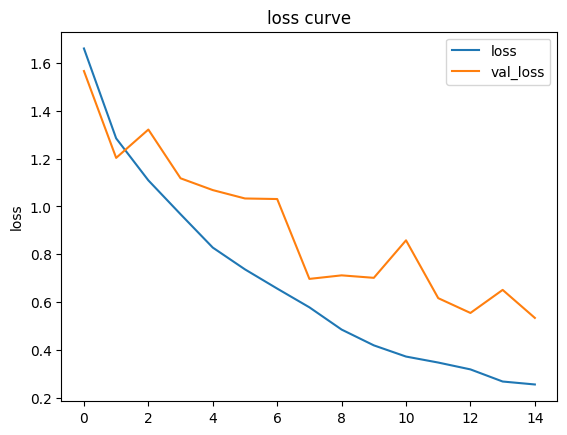

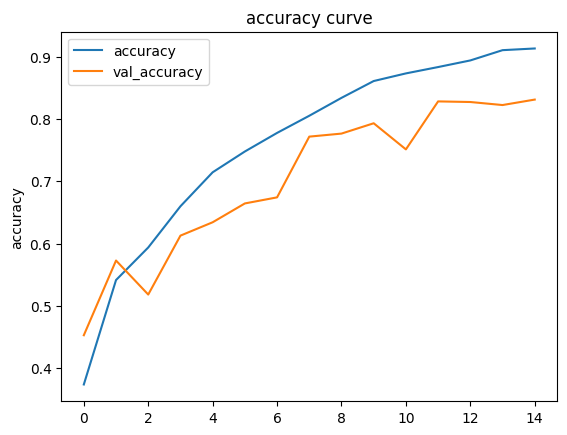

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.title('loss curve')
plt.ylabel('loss')
plt.legend()
plt.show()
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.title('accuracy curve')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
# from sklearn.metrics import confusion_matrix, classification_report
# import seaborn as sns
# from tensorflow.keras.utils import to_categorical

# # 預測測試集
# test_predictions = model.predict(test_data)
# # 將預測轉換為類別標籤
# predicted_labels = np.argmax(test_predictions, axis=1)

# # 繪製混淆矩陣
# cm = confusion_matrix(np.argmax(test_label, axis=1), predicted_labels)

# # 使用Seaborn繪製混淆矩陣的熱圖
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1', 'Class 2','Class 3','Class 4','Class 5','Class 6','Class 7','Class 8','Class 9','Class 10'], yticklabels=['Class 0', 'Class 1', 'Class 2','Class 3','Class 4','Class 5','Class 6','Class 7','Class 8','Class 9','Class 10'])
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Confusion Matrix')
# plt.show()

# # 打印分類報告
# print(classification_report(np.argmax(test_label, axis=1), predicted_labels, target_names=['Class 0', 'Class 1', 'Class 2','Class 3','Class 4','Class 5','Class 6','Class 7','Class 8','Class 9','Class 10']))

In [13]:
#建立 Classification Report

predictions = np.argmax(model.predict(test_generator), axis=1)
#predict = model.predict(pca_X_test)

cr = classification_report(test_generator.classes, predictions)
print(cr)

41/41 [==============================] - 44s 1s/step
              precision    recall  f1-score   support

           0       0.89      0.80      0.84       517
           1       0.85      0.90      0.87       545
           2       0.25      1.00      0.40         4
           3       0.77      0.84      0.80       150
           4       0.85      0.84      0.85       628
           5       0.85      0.72      0.78        96
           6       0.77      0.85      0.81       409
           7       0.86      0.76      0.81       132
           8       0.96      0.81      0.88        58
           9       0.00      0.00      0.00         9
          10       0.31      0.62      0.41        13

    accuracy                           0.83      2561
   macro avg       0.67      0.74      0.68      2561
weighted avg       0.84      0.83      0.83      2561



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


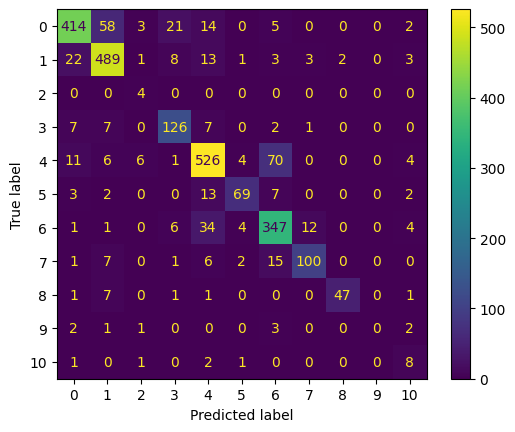

In [14]:
#建立Confusion Matrix
cm = confusion_matrix(test_generator.classes, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#### 5.(加分題)嘗試data_augmentation，比較結果是否變差或變好

### part2(被分配到的第二個導程)

#### 1.根據所被分配到的模型，以part1第一小題的架構，訓練被分配到的另一個導程資料集

In [18]:
### 讀取資料並將資料拆分
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os
import numpy as np
import pandas as pd
# 資料夾路徑
data_folder_path = '/kaggle/input/dataset/LEAD_aVL_output_classes_removed_border/LEAD_aVL_output_classes_removed_border'

# 建立資料集
data = []
labels = []

# 遍歷資料夾，獲取資料和標籤
for folder_name in os.listdir(data_folder_path):
    folder_path = os.path.join(data_folder_path, folder_name)
    if os.path.isdir(folder_path):
        label = folder_name.split('_')[-1] # 從資料夾名稱中取得標籤
        for filename in os.listdir(folder_path):
            file_path = os.path.join(folder_path, filename)
            data.append(file_path)
            labels.append(label)

# 轉換為NumPy陣列
data = np.array(data)
labels = np.array(labels)

# 使用 train_test_split 分割資料集
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)
train_data1, val_data, train_labels1, val_labels = train_test_split(train_data, train_labels, test_size=0.1, random_state=42)
# 建立 ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255,
                 samplewise_center=True,
                 samplewise_std_normalization=True,
                 width_shift_range=0.1,
                 height_shift_range=0.1,
                )  # 可以加入其他的圖像增強方法


# 建立 generator for training data
train_generator = datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': train_data1, 'class': train_labels1}),
    x_col='filename',
    y_col='class',
    batch_size=64,
    target_size=(224, 224),  # 設定圖像尺寸
    shuffle=True,
    class_mode='categorical',  # 因為我們使用的是整數的標籤，所以設定為 'raw'
)

# 建立 generator for validation data
val_generator = datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': val_data, 'class': val_labels}),
    x_col='filename',
    y_col='class',
    batch_size=64,
    shuffle=True,
    target_size=(224, 224),
    class_mode='categorical'
)

# 建立 generator for testing data
test_generator = datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': test_data, 'class': test_labels}),
    x_col='filename',
    y_col='class',
    shuffle=False,
    batch_size=64,
    target_size=(224, 224),
    class_mode='categorical'
)

Found 8595 validated image filenames belonging to 11 classes.
Found 956 validated image filenames belonging to 11 classes.
Found 2388 validated image filenames belonging to 11 classes.


In [19]:
# 載入 Xception 基本模型
xception_base = Xception(
    weights=None,
    include_top=False,
    input_shape=(224, 224, 3)
)

# 因為kaggle的問題無法引入權重，所以改成直接上網抓xception_weights，並引用其預訓練權重文件的路徑，
pretrained_weights_path = '/kaggle/input/xcep-model/xception_weights_tf_dim_ordering_tf_kernels_notop.h5'

# 載入預訓練權重
xception_base.load_weights(pretrained_weights_path)

# 凍結 Xception base model 的權重
freeze_layers = 10

for i, layer in enumerate(xception_base.layers):
    if i < freeze_layers:
        layer.trainable = False
    else:
         break

In [20]:
# 新添加的 Conv2D 層
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(xception_base.output)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)

## 以下部分不能修改
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)  # 調整 Dense 層的單元數
x = tf.keras.layers.Dropout(0.2)(x)  # 添加 Dropout 層，可以根據需要調整 dropout 比例
x = Dense(256, activation='relu')(x)  # 調整 Dense 層的單元數
x = tf.keras.layers.Dropout(0.2)(x)  # 添加 Dropout 層，可以根據需要調整 dropout 比例
x = Dense(128, activation='relu')(x)  # 再添加一層 Dense 層

output_layer = layers.Dense(units = 11, activation = 'softmax')(x)


# 建立 Xception model
model = tf.keras.Model(inputs=xception_base.input, outputs=output_layer)





In [21]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 111, 111, 32)         864       ['input_4[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 111, 111, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 111, 111, 32)         0         ['block1_conv1_bn[0][0]'

In [ ]:
# VGG_base=keras.applications.vgg16.VGG16(
#     weights="imagenet",
#     include_top=False,
#     input_shape=(180,180,3)
# )

# for layer in vgg16_base.layers:
#     layer.trainable = False

# # vgg16_base.summary()

# VGG16_model = models.Sequential()
# VGG16_model.add(vgg16_base)

# # 在 Conv2D 層中添加 padding='same' 參數
# VGG16_model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
# VGG16_model.add(layers.MaxPooling2D((2, 2)))
# VGG16_model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
# VGG16_model.add(layers.MaxPooling2D((2, 2)))
# VGG16_model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))

# ## 以下部分不能修改
# # VGG16_model.add(layers.Flatten())
# VGG16_model.add(layers.GlobalAveragePooling2D())
# VGG16_model.add(layers.Dense(1024, activation='relu'))
# VGG16_model.add(layers.Dense(11, activation='softmax'))

# VGG16_model.summary()

In [ ]:
#使用Adam，並凍結10層
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=4e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

epochs=15
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
    )

Epoch 1/15
135/135 [==============================] - 193s 1s/step - loss: 1.3162 - accuracy: 0.4933 - val_loss: 1.2784 - val_accuracy: 0.5418
Epoch 2/15
135/135 [==============================] - 168s 1s/step - loss: 0.9832 - accuracy: 0.6248 - val_loss: 0.9352 - val_accuracy: 0.6506
Epoch 3/15
135/135 [==============================] - 165s 1s/step - loss: 0.7959 - accuracy: 0.7069 - val_loss: 1.0334 - val_accuracy: 0.6151
Epoch 4/15
135/135 [==============================] - 164s 1s/step - loss: 0.6639 - accuracy: 0.7492 - val_loss: 0.6493 - val_accuracy: 0.7709
Epoch 5/15
135/135 [==============================] - 163s 1s/step - loss: 0.5403 - accuracy: 0.7995 - val_loss: 0.6299 - val_accuracy: 0.7552
Epoch 6/15
135/135 [==============================] - 163s 1s/step - loss: 0.4431 - accuracy: 0.8371 - val_loss: 0.5744 - val_accuracy: 0.7856
Epoch 7/15
135/135 [==============================] - 163s 1s/step - loss: 0.3955 - accuracy: 0.8546 - val_loss: 0.6569 - val_accuracy: 0.7364

In [ ]:
#特殊情況試驗:使用Adam，並凍結model全部層數
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=4e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

epochs=15
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
    )

Epoch 1/15
135/135 [==============================] - 174s 1s/step - loss: 1.6788 - accuracy: 0.3601 - val_loss: 1.4940 - val_accuracy: 0.4153
Epoch 2/15
135/135 [==============================] - 169s 1s/step - loss: 1.4736 - accuracy: 0.4294 - val_loss: 1.3772 - val_accuracy: 0.4697
Epoch 3/15
135/135 [==============================] - 170s 1s/step - loss: 1.4464 - accuracy: 0.4403 - val_loss: 1.3810 - val_accuracy: 0.4467
Epoch 4/15
135/135 [==============================] - 170s 1s/step - loss: 1.4042 - accuracy: 0.4499 - val_loss: 1.3521 - val_accuracy: 0.4728
Epoch 5/15
135/135 [==============================] - 169s 1s/step - loss: 1.3823 - accuracy: 0.4684 - val_loss: 1.3036 - val_accuracy: 0.4979
Epoch 6/15
135/135 [==============================] - 170s 1s/step - loss: 1.3666 - accuracy: 0.4682 - val_loss: 1.3207 - val_accuracy: 0.4728
Epoch 7/15
135/135 [==============================] - 170s 1s/step - loss: 1.3441 - accuracy: 0.4800 - val_loss: 1.2961 - val_accuracy: 0.4822

#### 2.使用與part1相同的兩個optimizer比較哪一種對於辨識效果比較好

In [ ]:
## RMSprop
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=4e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

epochs=15
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
    )

Epoch 1/15
135/135 [==============================] - 186s 1s/step - loss: 1.3827 - accuracy: 0.4782 - val_loss: 1.2837 - val_accuracy: 0.5199
Epoch 2/15
135/135 [==============================] - 166s 1s/step - loss: 1.0027 - accuracy: 0.6180 - val_loss: 0.9351 - val_accuracy: 0.6360
Epoch 3/15
135/135 [==============================] - 166s 1s/step - loss: 0.7873 - accuracy: 0.7013 - val_loss: 1.4315 - val_accuracy: 0.5492
Epoch 4/15
135/135 [==============================] - 170s 1s/step - loss: 0.6374 - accuracy: 0.7634 - val_loss: 0.9708 - val_accuracy: 0.7071
Epoch 5/15
135/135 [==============================] - 170s 1s/step - loss: 0.5133 - accuracy: 0.8114 - val_loss: 0.6760 - val_accuracy: 0.7793
Epoch 6/15
135/135 [==============================] - 173s 1s/step - loss: 0.4138 - accuracy: 0.8477 - val_loss: 0.6486 - val_accuracy: 0.7918
Epoch 7/15
135/135 [==============================] - 175s 1s/step - loss: 0.3592 - accuracy: 0.8695 - val_loss: 0.5920 - val_accuracy: 0.8138

In [ ]:
## SGD
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=4e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

epochs=15
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

Epoch 1/15
135/135 [==============================] - 183s 1s/step - loss: 2.3957 - accuracy: 0.1003 - val_loss: 2.3629 - val_accuracy: 0.1506
Epoch 2/15
135/135 [==============================] - 169s 1s/step - loss: 2.3594 - accuracy: 0.1590 - val_loss: 2.3400 - val_accuracy: 0.1705
Epoch 3/15
135/135 [==============================] - 169s 1s/step - loss: 2.3099 - accuracy: 0.1913 - val_loss: 2.2833 - val_accuracy: 0.2082
Epoch 4/15
135/135 [==============================] - 169s 1s/step - loss: 2.2301 - accuracy: 0.2007 - val_loss: 2.1993 - val_accuracy: 0.2103
Epoch 5/15
135/135 [==============================] - 180s 1s/step - loss: 2.1544 - accuracy: 0.2230 - val_loss: 2.1191 - val_accuracy: 0.2469
Epoch 6/15
135/135 [==============================] - 179s 1s/step - loss: 2.0854 - accuracy: 0.2389 - val_loss: 2.0549 - val_accuracy: 0.2594
Epoch 7/15
135/135 [==============================] - 171s 1s/step - loss: 2.0286 - accuracy: 0.2462 - val_loss: 2.0052 - val_accuracy: 0.2594

RMSprop準確度較高

#### 3.使用與part1第三小題一樣的optimizer及learning_rate，並畫出loss_curve、accuracy_curve、confusion_matrix及Classification_report

In [ ]:
## 特殊情況測試: learning_rate=4e-2 Adam
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=4e-2),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

epochs=15
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
    )

Epoch 1/15
135/135 [==============================] - 227s 1s/step - loss: 6.2035 - accuracy: 0.2578 - val_loss: 1.8967 - val_accuracy: 0.2824
Epoch 2/15
135/135 [==============================] - 168s 1s/step - loss: 1.8535 - accuracy: 0.2714 - val_loss: 1.8770 - val_accuracy: 0.2824
Epoch 3/15
135/135 [==============================] - 168s 1s/step - loss: 1.8518 - accuracy: 0.2761 - val_loss: 1.8818 - val_accuracy: 0.2824
Epoch 4/15
135/135 [==============================] - 167s 1s/step - loss: 1.8520 - accuracy: 0.2792 - val_loss: 1.8930 - val_accuracy: 0.2824
Epoch 5/15
135/135 [==============================] - 168s 1s/step - loss: 1.8508 - accuracy: 0.2754 - val_loss: 1.8708 - val_accuracy: 0.2824
Epoch 6/15
135/135 [==============================] - 168s 1s/step - loss: 1.8498 - accuracy: 0.2763 - val_loss: 1.8786 - val_accuracy: 0.2824
Epoch 7/15
135/135 [==============================] - 168s 1s/step - loss: 1.8498 - accuracy: 0.2753 - val_loss: 1.8683 - val_accuracy: 0.2824

In [22]:
## Adam 用來畫後面的loss, accuracy之類的圖
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=4e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

epochs=15
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
    )

Epoch 1/15
135/135 [==============================] - 260s 2s/step - loss: 1.5304 - accuracy: 0.3859 - val_loss: 1.4745 - val_accuracy: 0.4791
Epoch 2/15
135/135 [==============================] - 167s 1s/step - loss: 1.1670 - accuracy: 0.5208 - val_loss: 1.2641 - val_accuracy: 0.4508
Epoch 3/15
135/135 [==============================] - 167s 1s/step - loss: 1.0207 - accuracy: 0.5956 - val_loss: 1.2958 - val_accuracy: 0.5115
Epoch 4/15
135/135 [==============================] - 167s 1s/step - loss: 0.8979 - accuracy: 0.6581 - val_loss: 1.0985 - val_accuracy: 0.5994
Epoch 5/15
135/135 [==============================] - 166s 1s/step - loss: 0.8267 - accuracy: 0.6896 - val_loss: 0.9298 - val_accuracy: 0.6726
Epoch 6/15
135/135 [==============================] - 165s 1s/step - loss: 0.7291 - accuracy: 0.7358 - val_loss: 1.4928 - val_accuracy: 0.5785
Epoch 7/15
135/135 [==============================] - 168s 1s/step - loss: 0.6422 - accuracy: 0.7694 - val_loss: 0.9601 - val_accuracy: 0.6810

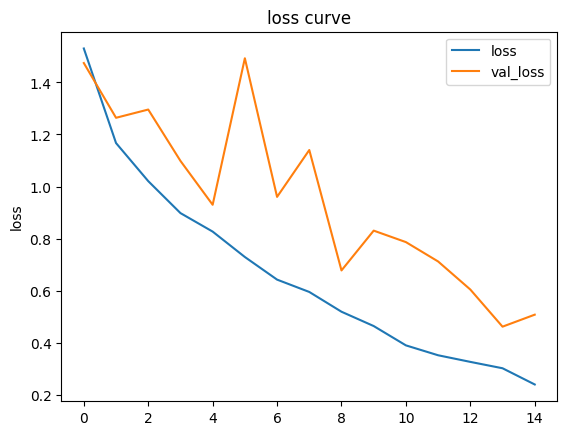

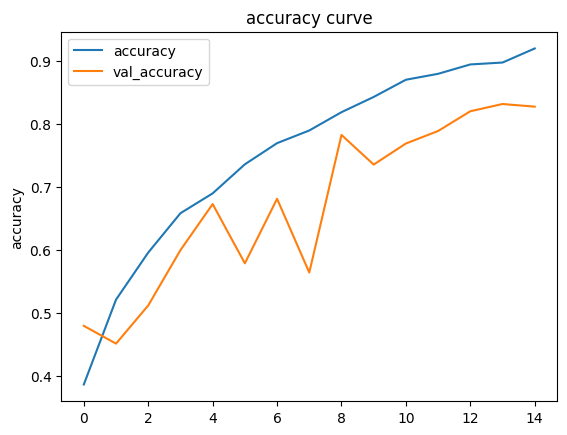

In [23]:
#畫loss, accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.title('loss curve')
plt.ylabel('loss')
plt.legend()
plt.show()
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.title('accuracy curve')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
# from sklearn.metrics import confusion_matrix, classification_report
# import seaborn as sns
# from tensorflow.keras.utils import to_categorical

# # 預測測試集
# test_predictions = model.predict(test_data)
# # 將預測轉換為類別標籤
# predicted_labels = np.argmax(test_predictions, axis=1)

# # 繪製混淆矩陣
# cm = confusion_matrix(np.argmax(test_label, axis=1), predicted_labels)

# # 使用Seaborn繪製混淆矩陣的熱圖
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1', 'Class 2','Class 3','Class 4','Class 5','Class 6','Class 7','Class 8','Class 9','Class 10'], yticklabels=['Class 0', 'Class 1', 'Class 2','Class 3','Class 4','Class 5','Class 6','Class 7','Class 8','Class 9','Class 10'])
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Confusion Matrix')
# plt.show()

# # 打印分類報告
# print(classification_report(np.argmax(test_label, axis=1), predicted_labels, target_names=['Class 0', 'Class 1', 'Class 2','Class 3','Class 4','Class 5','Class 6','Class 7','Class 8','Class 9','Class 10']))

In [12]:
#引用評估模型的套件
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay

In [24]:
#建立 Classification Report

predictions = np.argmax(model.predict(test_generator), axis=1)
#predict = model.predict(pca_X_test)

cr = classification_report(test_generator.classes, predictions)
print(cr)

38/38 [==============================] - 62s 2s/step
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       421
           1       0.85      0.85      0.85       450
           2       1.00      1.00      1.00         4
           3       0.95      0.76      0.85       119
           4       0.91      0.75      0.82       657
           5       0.42      0.60      0.49       107
           6       0.77      0.81      0.79       428
           7       0.64      0.75      0.69       134
           8       0.82      0.64      0.72        42
           9       1.00      0.33      0.50         9
          10       1.00      0.12      0.21        17

    accuracy                           0.80      2388
   macro avg       0.83      0.69      0.71      2388
weighted avg       0.82      0.80      0.80      2388



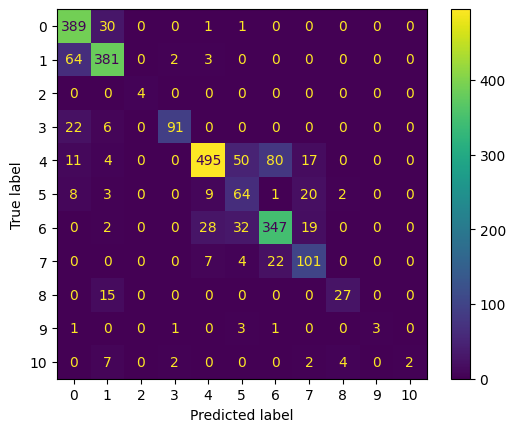

In [25]:
#建立Confusion Matrix
cm = confusion_matrix(test_generator.classes, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#### 4.(加分題)嘗試data_augmentation，比較結果是否變差或變好

## 第三題

### 心得part1

#### 觀察第一大題的結果，比較模型架構對兩個導程辨識的效果(調整哪些參數對辨識結果影響較大)


個人認為此次訓練最重點的地方不是自己設的架構，而是在transfer learning上，當然不是說設計架構不重要，對我而言架構就是盡量try and error，頂多中間加dropout和Global Average Pooling防止overfitting，而Dense層目的則是引入非線性映射，提取更複雜的特徵。整體準確度不會差太多。

但transfer learning則嚴重影響到accuracy，一開始有嘗試將Xception全部凍結，但不管怎麼跑準確度極限就在50多%而已，個人認為這是因為我引用的權重當初是拿來辨識不同圖片種類用的，但此次訓練只要辨識心電圖間的不同而已，也因此全部凍結就會將比較深層的特徵給凍結住，而此特徵在目前主題下完全不適用。也因此後來我嘗試只凍結前面此層，保留比較通用的特徵再去訓練，這時準確度才終於提升了。

### 心得part2

#### 觀察第二大題的結果，比較模型架構對兩個導程辨識的效果(調整哪些參數對辨識結果影響較大)

個人認為重點仍是以transfer learning為主，加了CNN其實accuracy也是差不多。而在訓練過程中意外發現不管加多少層架構，訓練時間都差不多，甚至有嘗試過全凍結與全解凍model訓練，其時間也差不多，這可以說明訓練參數在這次作業中並不是影響訓練時間的主因，個人認為是輸入資料集大小才是主因。

硬要說的話，額外加的架構中，添加了激活為ReLU的卷積核的Conv2D層，使用3x3的卷積核大小，same填充，這一層有助於捕捉局部特徵，並在模型中引入了更多的非線性轉換；而MaxPooling2D層，透過2x2的池化核減少特徵圖的空間尺寸，有助於減少計算負擔同時保留重要的特徵。

此外本人還有測試在不同learning rate下訓練會有何不同，分別有測試4e-2, 4e-4, 4e-5，可以發現一昧增加training rate並不會增加accuracy，反而會降低，當4e-4時觀察其每個epoch就可以發現其accuracy已經有點搖擺不定了，而在4e-2就可以很明顯看出其accuracy直接卡在20多%上升不去。在本次實驗model的learning rate適合在e-4~e-5中做測試會比較好做到收斂，時間勉強也不會跑太久。